In [1]:
import tensorflow as tf
print(tf.__version__)

2025-11-02 20:30:07.219825: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.12.0


# MNIST Digit Classification with a Feedforward Neural Network  
**Student:** Victoria Salomon  
**Framework:** TensorFlow / Keras  
**Goal:** Train a simple feedforward neural network (FNN) to classify handwritten digits (0–9) from the MNIST dataset.

This notebook covers:
1. Data loading and preprocessing  
2. Model definition  
3. Training  
4. Evaluation on test data  
5. Single image prediction demo


## Imports and Load Data

In [6]:

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# Load MNIST dataset from Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Train images:", x_train.shape)
print("Train labels:", y_train.shape)
print("Test images:", x_test.shape)
print("Test labels:", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
Train images: (60000, 28, 28)
Train labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)


## Preprocessing (Code cell)

In [9]:
# 1. Normalize pixel values (0-255 → 0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 2. Flatten 28x28 → 784 vector
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# 3. One-hot encode labels (e.g. "3" -> [0,0,0,1,0,0,0,0,0,0])
num_classes = 10
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

print("x_train shape after flatten:", x_train.shape)
print("y_train one-hot shape:", y_train_cat.shape)

from tensorflow.keras.utils import to_categorical

# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

print("y_train one-hot shape:", y_train_cat.shape)
print("y_test one-hot shape:", y_test_cat.shape)

x_train shape after flatten: (60000, 784)
y_train one-hot shape: (60000, 10)
y_train one-hot shape: (60000, 10)
y_test one-hot shape: (10000, 10)


## Define the Model (Code cell)

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(
    x_train, y_train_cat,
    epochs=5,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2710 - accuracy: 0.9235 - val_loss: 0.1502 - val_accuracy: 0.9568
Epoch 2/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1187 - accuracy: 0.9643 - val_loss: 0.0904 - val_accuracy: 0.9752
Epoch 3/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0823 - accuracy: 0.9761 - val_loss: 0.0849 - val_accuracy: 0.9752
Epoch 4/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0613 - accuracy: 0.9819 - val_loss: 0.0842 - val_accuracy: 0.9763
Epoch 5/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0467 - accuracy: 0.9860 - val_loss: 0.0724 - val_accuracy: 0.9768


## Compile the Model (Code cell)

In [7]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


## Train the Model (Code cell)

### Model Summary 
Bellow is a summary of the model architecture showing the total parameters and layer connections 

In [8]:
history = model.fit(
    x_train,
    y_train_cat,
    epochs=5,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2741 - accuracy: 0.9225 - val_loss: 0.1337 - val_accuracy: 0.9638
Epoch 2/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1214 - accuracy: 0.9644 - val_loss: 0.1093 - val_accuracy: 0.9685
Epoch 3/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0846 - accuracy: 0.9745 - val_loss: 0.0891 - val_accuracy: 0.9750
Epoch 4/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0637 - accuracy: 0.9805 - val_loss: 0.0801 - val_accuracy: 0.9778
Epoch 5/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0488 - accuracy: 0.9855 - val_loss: 0.0770 - val_accuracy: 0.9810


## Evaluate on Test Set (Code cell)

In [16]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)

print("Final Test Loss:", test_loss)
print("Final Test Accuracy:", test_accuracy)

Final Test Loss: 0.07864340394735336
Final Test Accuracy: 0.9758999943733215


## Single Prediction Demo (Code cell)

1/1 [==============================] - 0s 75ms/step
Model prediction: 7
True label: 7


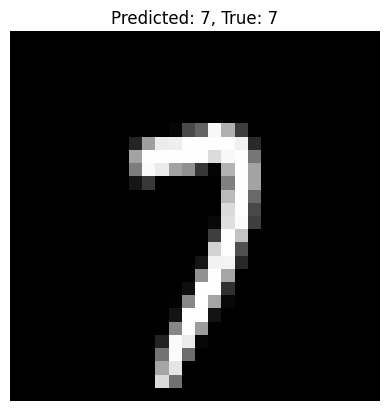

In [11]:
import random
import matplotlib.pyplot as plt

# pick a random index from test set
i = random.randint(0, x_test.shape[0] - 1)

sample_image = x_test[i]
sample_label = y_test[i]

sample_input = np.expand_dims(sample_image, axis=0)

prediction = model.predict(sample_input)
predicted_digit = np.argmax(prediction[0])

print("Model prediction:", predicted_digit)
print("True label:", sample_label)

plt.imshow(sample_image.reshape(28, 28), cmap="gray")
plt.title(f"Predicted: {predicted_digit}, True: {sample_label}")
plt.axis("off")
plt.show()

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

print("TensorFlow:", tf.__version__)
print("Matplotlib imported successfully!")

2025-11-02 20:49:52.493149: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow: 2.12.0
Matplotlib imported successfully!


## Save the model 
This let us use the model again in the future 

In [15]:
model.save("mnist_model_victoria.h5")
print("Model saved successfully!")

Model saved successfully!
